We start by importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, classification_report

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
edu_df = pd.read_csv('education.csv')

Let's look at the data.

In [3]:
edu_df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
edu_df.shape

(480, 17)

In [5]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.9+ KB


In [6]:
edu_df.nunique()

gender                       2
NationalITy                 14
PlaceofBirth                14
StageID                      3
GradeID                     10
SectionID                    3
Topic                       12
Semester                     2
Relation                     2
raisedhands                 82
VisITedResources            89
AnnouncementsView           88
Discussion                  90
ParentAnsweringSurvey        2
ParentschoolSatisfaction     2
StudentAbsenceDays           2
Class                        3
dtype: int64

So there is no null value in the data and also most of the features are categorical in nature. Below I am listing all the attributes and what they stand for which I have taken from the [Kaggle](https://www.kaggle.com/aljarah/xAPI-Edu-Data) page.

**Attributes**

1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’
Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not
(nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

The students are classified into three numerical intervals based on their total grade/mark:

Low-Level: interval includes values from 0 to 69,

Middle-Level: interval includes values from 70 to 89,

High-Level: interval includes values from 90-100.

The features are classified into three major categories: 

(1) Demographic features such as gender and nationality. 

(2) Academic background features such as educational stage, grade Level and section. (

(3) Behavioral features such as raised hand on class, opening resources, answering survey by parents, and school satisfaction.

## Exploratory Data Analysis

The first question that we ask is - **Where do the students currently enrolled in the online classes come from? What are the male to female ratios?**

The attributes that will help us to find answers to these are - 'NationalITy', 'PlaceofBirth' and 'gender'.

In [7]:
edu_df['NationalITy'].unique()

array(['KW', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Palestine',
       'Iraq', 'Lybia'], dtype=object)

In [8]:
edu_df['PlaceofBirth'].unique()

array(['KuwaIT', 'lebanon', 'Egypt', 'SaudiArabia', 'USA', 'Jordan',
       'venzuela', 'Iran', 'Tunis', 'Morocco', 'Syria', 'Iraq',
       'Palestine', 'Lybia'], dtype=object)

Both of these attributes basically carry the same information and hence we drop one of them.

In [4]:
edu_df.drop('NationalITy', axis=1, inplace=True)

In [10]:
edu_df.columns

Index(['gender', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
       'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

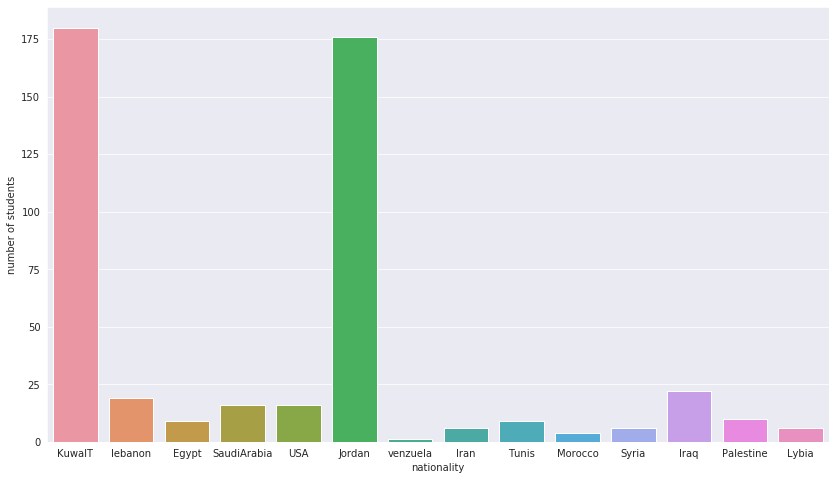

In [11]:
plt.figure(figsize=(14,8))
sns.countplot('PlaceofBirth', data=edu_df)
plt.xlabel('nationality')
plt.ylabel('number of students');

From the above plot, we see that most of the enrollments are from Kuwait and Jordon. Although most of the students come from middle east countries, interestingly there are some enrollments from the united states.

Next we look at the male to female ratio for each of these countries.

In [12]:
sorted_place = edu_df['PlaceofBirth'].value_counts().index

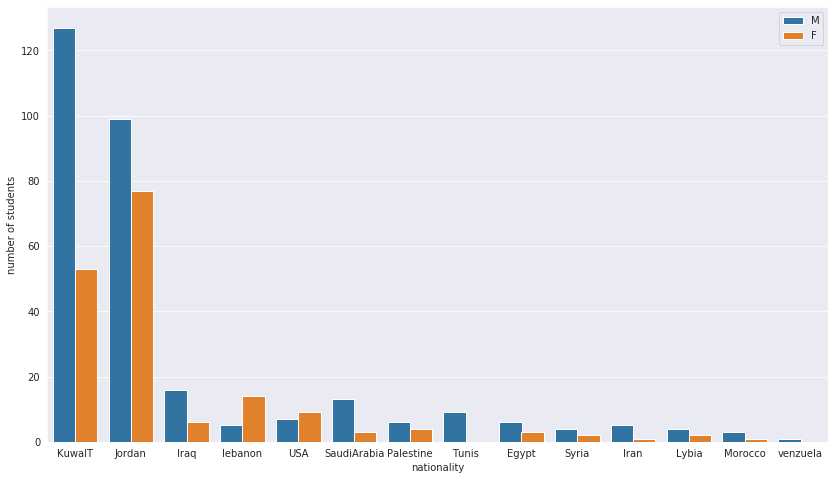

In [13]:
plt.figure(figsize=(14,8))
sns.countplot('PlaceofBirth', hue='gender', data=edu_df, order=sorted_place)
plt.xlabel('nationality')
plt.ylabel('number of students')
plt.legend(loc='upper right');

On average, the number of female students as compared to male students is quite low. In case of Lebanon, number of female enrollment is almost double that of male enrollments and in case of USA, it is slightly higher.

The next question of interest might be - **what is the general distribution of education levels of students? Is there any gender bias?**

The attributes 'StageID' and 'gender' will help us to find the answers.

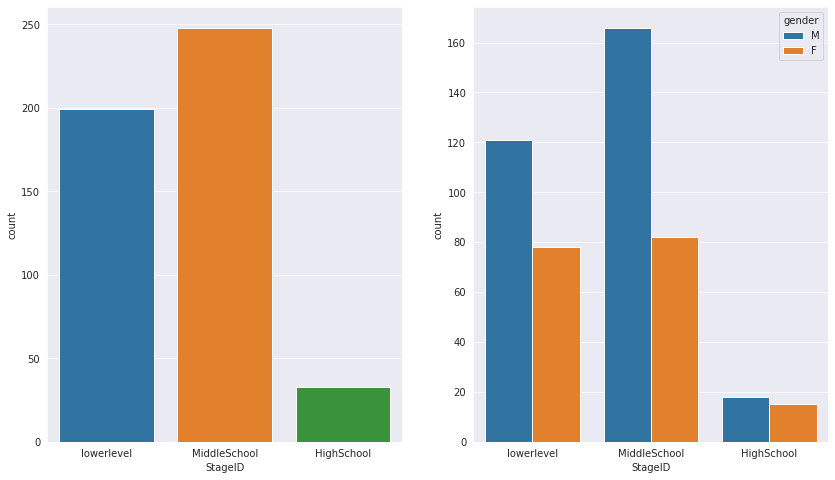

In [14]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot('StageID', data=edu_df, ax=ax[0])
sns.countplot('StageID', hue='gender', data=edu_df, ax=ax[1]);

Most of the students are from middle school. An interesting point to note is that, numbers of male and female students coming from high school are almost comparable.

**What are the popular topics among students?**

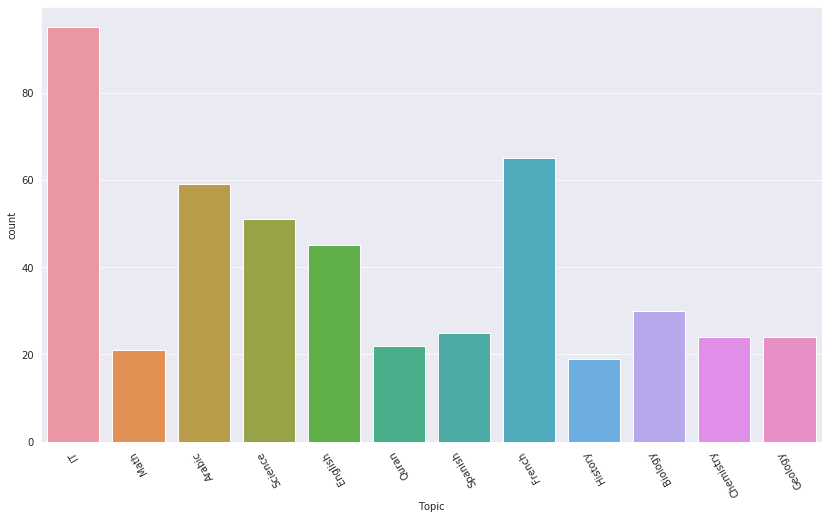

In [15]:
labels = edu_df['Topic'].unique()

plt.figure(figsize=(14,8))
f = sns.countplot('Topic', data=edu_df)
f.set_xticklabels(labels=labels, rotation=120);

So most of the students have enrolled for IT. Interestingly, next popular topics are two languages - French and Arabic.

Another interesting point might be to see **whether there is any influence coming from the background of a student on topic selection.**

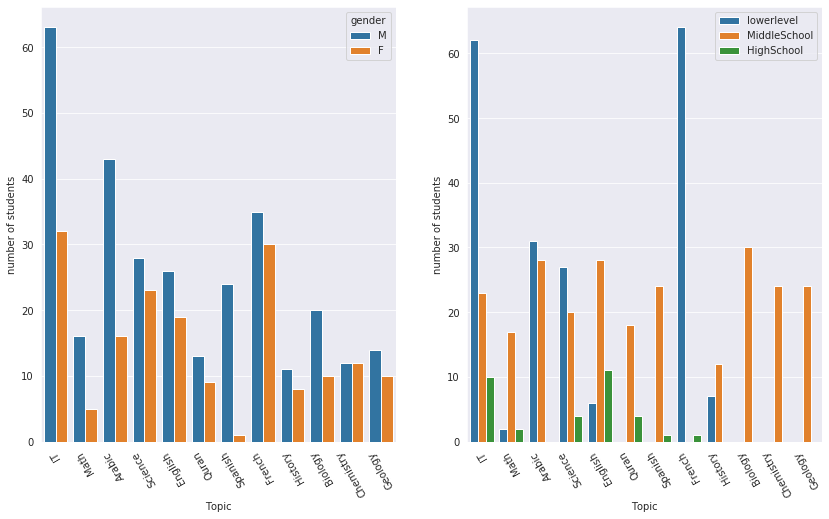

In [16]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.countplot('Topic', hue='gender', data=edu_df, ax=ax[0])
sns.countplot('Topic', hue='StageID', data=edu_df, ax=ax[1])
ax[0].set_ylabel("number of students")
ax[1].set_ylabel("number of students")
ax[0].set_xticklabels(labels=labels, rotation=120)
ax[1].set_xticklabels(labels=labels, rotation=120)
ax[1].legend(loc='upper right');

Chemistry seems to be equally popular among both female and male students. Students enrolled for biology, chemistry and geology are from middle school only.

Next we check **how popular the topics are in different countries that the students come from.** We look at some countries with high enrollment numbers.

In [17]:
topic_order = edu_df['Topic'].value_counts().index

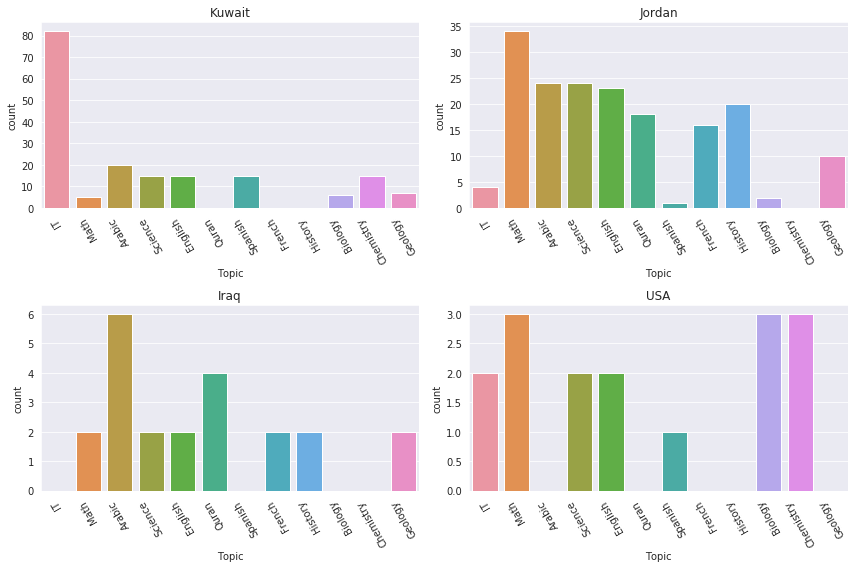

In [18]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
sns.countplot(edu_df.query('PlaceofBirth=="KuwaIT"')['Topic'], ax=ax[0,0], order=topic_order)
sns.countplot(edu_df.query('PlaceofBirth=="Jordan"')['Topic'], ax=ax[0,1], order=topic_order)
sns.countplot(edu_df.query('PlaceofBirth=="Iraq"')['Topic'], ax=ax[1,0], order=topic_order)
sns.countplot(edu_df.query('PlaceofBirth=="USA"')['Topic'], ax=ax[1,1], order=topic_order)
ax[0,0].set_xticklabels(labels=labels, rotation=120)
ax[0,1].set_xticklabels(labels=labels, rotation=120)
ax[1,0].set_xticklabels(labels=labels, rotation=120)
ax[1,1].set_xticklabels(labels=labels, rotation=120)
ax[0,0].set_title('Kuwait')
ax[0,1].set_title('Jordan')
ax[1,0].set_title('Iraq')
ax[1,1].set_title('USA')
plt.tight_layout();

Quite a few things to observe here :

- IT has the highest demand in Kuwait (also highest among the four countries shown above).
- Math is the most popular topic in Jordan.
- No student from Iraq has taken IT.
- There is a comparable demand of math, biology and chemistry in USA.

In [19]:
edu_df.columns

Index(['gender', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
       'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

Next we ask the question, **what factors affect the grade of a student?** Note that the grade of a student is directly related to the 'class' the student belongs to.

The attributes of interest to find answer to this question are:
1. raisedhands
2. VisITedResources
3. AnnouncementsView
4. Discussion
5. StudentAbsenceDays

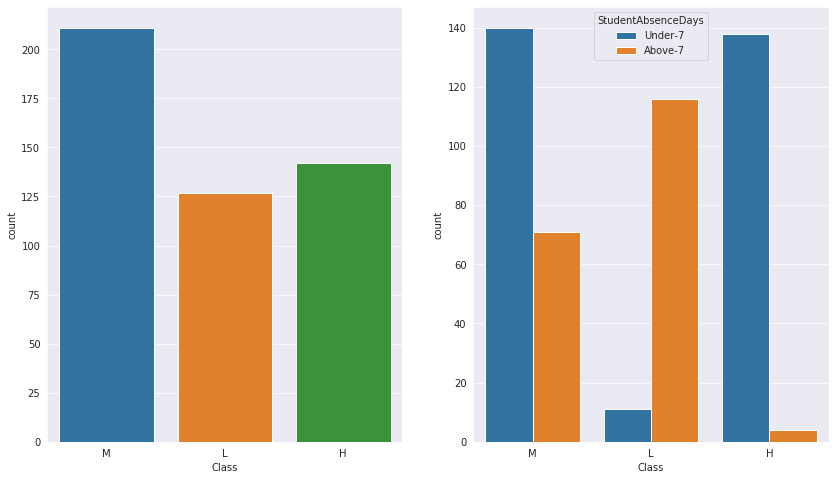

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14,8))
sns.countplot('Class', data=edu_df, ax=ax[0])
sns.countplot('Class', hue='StudentAbsenceDays', data=edu_df, ax=ax[1]);

So most of the students belong to 'middle level' with scores in the range 70-89. Students in 'high level' have high attendance rate whereas those in 'low level' have the lowest attendance rate. 

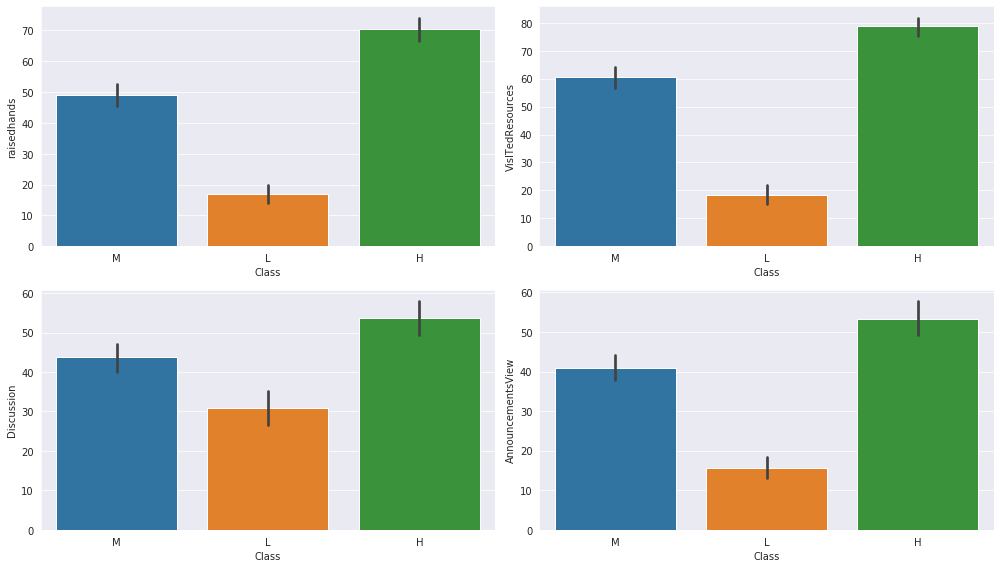

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(14,8))
sns.barplot(x='Class', y='raisedhands', data=edu_df, ax=ax[0,0])
sns.barplot(x='Class', y='VisITedResources', data=edu_df, ax=ax[0,1])
sns.barplot(x='Class', y='Discussion', data=edu_df, ax=ax[1,0])
sns.barplot(x='Class', y='AnnouncementsView', data=edu_df, ax=ax[1,1])
plt.tight_layout();

It is clear from the above plots that students who are more involved in the classroom activities generally score high marks. Another interesting observation could be **how female students perform compared to male student?**

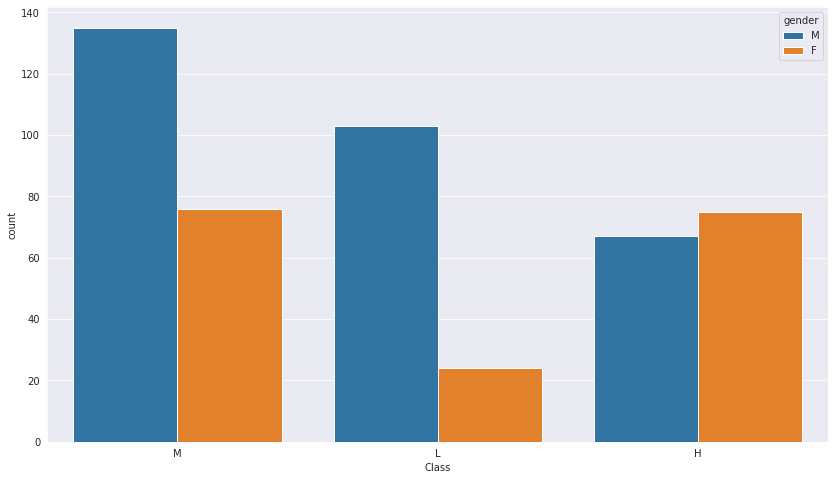

In [22]:
plt.figure(figsize=(14,8))
sns.countplot('Class', hue='gender', data=edu_df);

As we can see from the above plot, female students tend to have higher performance scores as compared to male students.

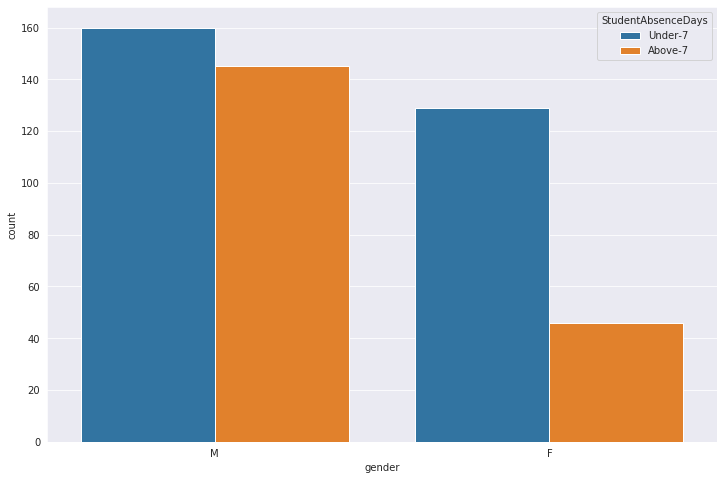

In [23]:
plt.figure(figsize=(12,8))
sns.countplot('gender', hue='StudentAbsenceDays', data=edu_df);

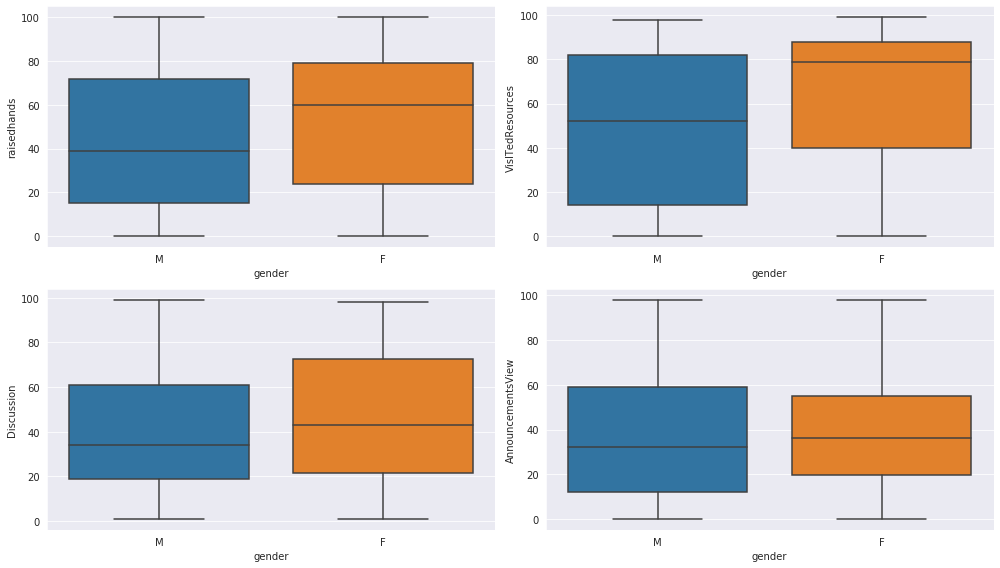

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(14,8))
sns.boxplot(x='gender', y='raisedhands', data=edu_df, ax=ax[0,0])
sns.boxplot(x='gender', y='VisITedResources', data=edu_df, ax=ax[0,1])
sns.boxplot(x='gender', y='Discussion', data=edu_df, ax=ax[1,0])
sns.boxplot(x='gender', y='AnnouncementsView', data=edu_df, ax=ax[1,1])
plt.tight_layout();

Few points to note from the above plots:

1. Female students have a better attendance rate.
2. Also they are generally more involved in the classroom activities as compared to fellow male students.

This also explains why female students generally score higher than male students. Note that, this is also in line with our general observation.

The attributes 'SectionID', 'StageID' and 'Semester' might also have effects on how a student performs. We investigate that below.

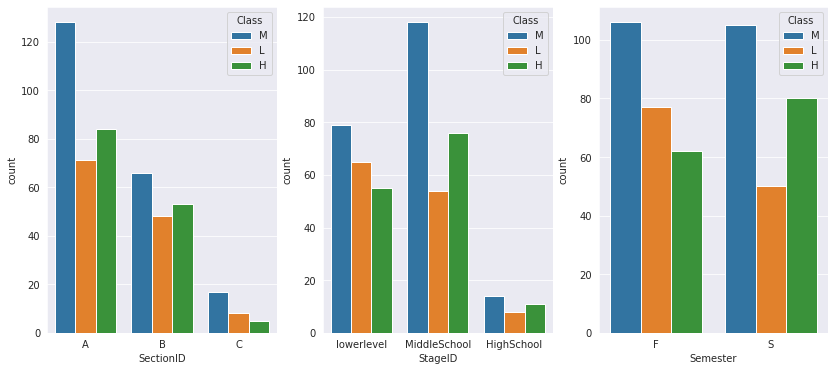

In [25]:
fig, ax = plt.subplots(1,3, figsize=(14,6))
sns.countplot('SectionID', hue='Class', data=edu_df, ax=ax[0])
sns.countplot('StageID', hue='Class', data=edu_df, ax=ax[1])
sns.countplot('Semester', hue='Class', data=edu_df, ax=ax[2]);

Couple of interesting points to note here are:

1. Students of section A have shown an overall better performance and very few students from section C have scored high marks.
2. Students coming from middle school have have the highest number of 'middle-level' and 'high-level' grades. In case of high school, these two numbers are almost comparable.
3. There is a decrease in number of 'low-level' grades and a corresponding increase in number of 'high-level' grades in second semester. That means, as students transit from first to second semester, they generally give a better performance.

**How students perform in different topics?**

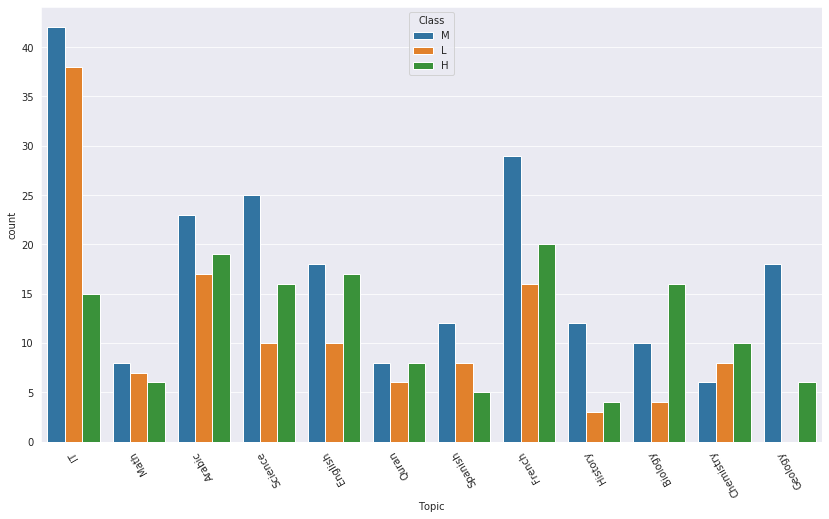

In [26]:
plt.figure(figsize=(14,8))
f = sns.countplot('Topic', hue='Class', data=edu_df)
f.set_xticklabels(labels=labels, rotation=120);

Although IT has maximum number of enrollments, the overall performance of students in this course is poor as compared to others since the number of students with high marks are significantly lower than that with low and average marks (which are almost comparable in this case). In subjects like biology and chemistry, most of the students have scored high marks. Also in gelogy, there is no student with low score. 

Let's now see **how much parents are satisfied with each school of study.**

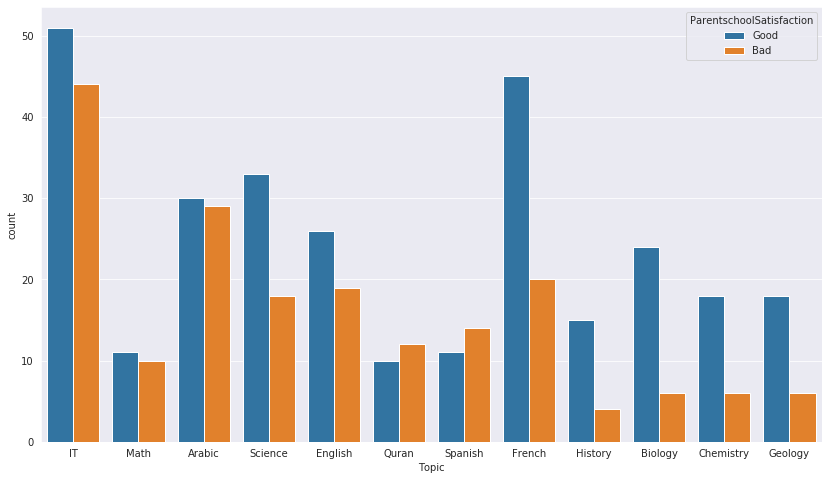

In [27]:
plt.figure(figsize=(14,8))
sns.countplot('Topic', hue='ParentschoolSatisfaction', data=edu_df);

One interesting point to note is that the most popular course IT has received almost comparable number of good and bad reviews. Courses like chemistry, biology have got significantly more number of positive feedbacks from parents. Looking at the last two plots, it seems that parents voting for each of the school of studies have been affected by the performance of their children in those courses.

It will be interesting to monitor how all these factors affect future students to take up a particular course. Also studying these data will help the organization to make improvements in 

## Building a classification model 

In [5]:
edu_df.columns

Index(['gender', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic',
       'Semester', 'Relation', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

We consider the following features to train our model.

In [29]:
X = edu_df[['gender', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'raisedhands', 
             'VisITedResources', 'AnnouncementsView', 'Discussion', 'StudentAbsenceDays']]
X.head()

,gender,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,KuwaIT,lowerlevel,G-04,A,IT,F,15,16,2,20,Under-7
1,M,KuwaIT,lowerlevel,G-04,A,IT,F,20,20,3,25,Under-7
2,M,KuwaIT,lowerlevel,G-04,A,IT,F,10,7,0,30,Above-7
3,M,KuwaIT,lowerlevel,G-04,A,IT,F,30,25,5,35,Above-7
4,M,KuwaIT,lowerlevel,G-04,A,IT,F,40,50,12,50,Above-7


In [30]:
y = edu_df['Class']

Convert all the categorical variables into dummy variables.

In [31]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,...,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,20,20,3,25,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,10,7,0,30,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


So we have total 44 features to train our model on. Let's split our dataset into train and test sets. 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
X_train.shape, X_test.shape

((384, 44), (96, 44))

In [67]:
model_list = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier()]

param_dict = [
              {'C': [0.1, 0.5, 1.0]},
              {'n_neighbors': [10, 50, 100]},
              {'n_estimators': [100, 200, 400]}
             ]

In [68]:
for model, param in zip(model_list, param_dict):
    grid_cv = GridSearchCV(estimator=model, param_grid=param, verbose=3)
    print("the current estimator is : {}".format(model))
    grid_cv.fit(X_train, y_train)
    print()
    print("the best score on the training set is : {} for the parameter {}".format(grid_cv.best_score_, 
                                                                                   grid_cv.best_params_))
    print()

the current estimator is : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.805, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.649, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.753, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.688, total=   0.0s
[CV] C=0.1 ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data

[CV] ............................... C=0.5, score=0.766, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.597, total=   0.1s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.792, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.688, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.684, total=   0.0s
[CV] C=1.0 ...........................................................


/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/nabanita/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://

[CV] ............................... C=1.0, score=0.753, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.597, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.805, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.662, total=   0.0s
[CV] C=1.0 ...........................................................
[CV] ............................... C=1.0, score=0.697, total=   0.0s

the best score on the training set is : 0.7160628844839371 for the parameter {'C': 0.1}

the current estimator is : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Fitting 5 folds for each of 3 candidates, totalling 15 fi

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.831, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.701, total=   0.1s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.779, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.714, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.750, total=   0.1s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.805, total=   0.3s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.662, total=   0.3s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.753, total=   0.3s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.688, total=   0.3s
[CV] n_estimators=200 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.6s finished


In [69]:
print("The overall best estimator is {} with parameter {} and it produces a cross-validated score {} on the training set".
      format(grid_cv.best_estimator_, grid_cv.best_params_, grid_cv.best_score_))

The overall best estimator is RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) with parameter {'n_estimators': 100} and it produces a cross-validated score 0.7551948051948052 on the training set


In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [62]:
param_dict = [
              {'classifier__C': [0.1, 0.5, 1.0]},
              {'classifier__n_neighbors': [10, 50, 100]},
              {'classifier__n_estimators': [100, 200, 400]}
             ]

for model, param in zip(model_list, param_dict):
    pipeline = Pipeline([
                        ('scaler', MinMaxScaler()),
                        ('classifier', model) 
                       ])
    grid_cv = GridSearchCV(estimator=pipeline, param_grid=param, verbose=3)
    print("the current estimator is : {}".format(model))
    grid_cv.fit(X_train, y_train)
    print()
    print("the best score on the training set is : {} for the parameter {}".format(grid_cv.best_score_, 
                                                                                   grid_cv.best_params_))
    print()

the current estimator is : LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] classifier__C=0.1 ...............................................
[CV] ................... classifier__C=0.1, score=0.818, total=   0.0s
[CV] classifier__C=0.1 ...............................................
[CV] ................... classifier__C=0.1, score=0.623, total=   0.0s
[CV] classifier__C=0.1 ...............................................
[CV] ................... classifier__C=0.1, score=0.766, total=   0.0s
[CV] classifier__C=0.1 ...............................................
[CV] ................... classifier__C=0.1, score=0.623, total=   0.0s
[CV] classifier__C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ................... classifier__C=0.5, score=0.724, total=   0.0s
[CV] classifier__C=1.0 ...............................................
[CV] ................... classifier__C=1.0, score=0.805, total=   0.0s
[CV] classifier__C=1.0 ...............................................
[CV] ................... classifier__C=1.0, score=0.584, total=   0.0s
[CV] classifier__C=1.0 ...............................................
[CV] ................... classifier__C=1.0, score=0.753, total=   0.0s
[CV] classifier__C=1.0 ...............................................
[CV] ................... classifier__C=1.0, score=0.675, total=   0.0s
[CV] classifier__C=1.0 ...............................................
[CV] ................... classifier__C=1.0, score=0.697, total=   0.0s

the best score on the training set is : 0.7135680109364321 for the parameter {'classifier__C': 0.5}

the current estimator is : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                 

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... classifier__n_neighbors=10, score=0.636, total=   0.0s
[CV] classifier__n_neighbors=10 ......................................
[CV] .......... classifier__n_neighbors=10, score=0.592, total=   0.0s
[CV] classifier__n_neighbors=50 ......................................
[CV] .......... classifier__n_neighbors=50, score=0.688, total=   0.0s
[CV] classifier__n_neighbors=50 ......................................
[CV] .......... classifier__n_neighbors=50, score=0.584, total=   0.0s
[CV] classifier__n_neighbors=50 ......................................
[CV] .......... classifier__n_neighbors=50, score=0.636, total=   0.0s
[CV] classifier__n_neighbors=50 ......................................
[CV] .......... classifier__n_neighbors=50, score=0.597, total=   0.0s
[CV] classifier__n_neighbors=50 ......................................
[CV] .......... classifier__n_neighbors=50, score=0.592, total=   0.0s
[CV] classifier__n_neighbors=100 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ........ classifier__n_estimators=100, score=0.818, total=   0.1s
[CV] classifier__n_estimators=100 ....................................
[CV] ........ classifier__n_estimators=100, score=0.675, total=   0.1s
[CV] classifier__n_estimators=100 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ........ classifier__n_estimators=100, score=0.818, total=   0.1s
[CV] classifier__n_estimators=100 ....................................
[CV] ........ classifier__n_estimators=100, score=0.675, total=   0.1s
[CV] classifier__n_estimators=100 ....................................
[CV] ........ classifier__n_estimators=100, score=0.737, total=   0.1s
[CV] classifier__n_estimators=200 ....................................
[CV] ........ classifier__n_estimators=200, score=0.818, total=   0.3s
[CV] classifier__n_estimators=200 ....................................
[CV] ........ classifier__n_estimators=200, score=0.701, total=   0.3s
[CV] classifier__n_estimators=200 ....................................
[CV] ........ classifier__n_estimators=200, score=0.805, total=   0.3s
[CV] classifier__n_estimators=200 ....................................
[CV] ........ classifier__n_estimators=200, score=0.688, total=   0.3s
[CV] classifier__n_estimators=200 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.6s finished



the best score on the training set is : 0.755228981544771 for the parameter {'classifier__n_estimators': 200}



In [63]:
print("The overall best estimator is {} with parameter {} and it produces a cross-validated score {} on the training set".
      format(grid_cv.best_estimator_, grid_cv.best_params_, grid_cv.best_score_))

The overall best estimator is Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False) with paramet

In [70]:
pred = grid_cv.predict(X_test)

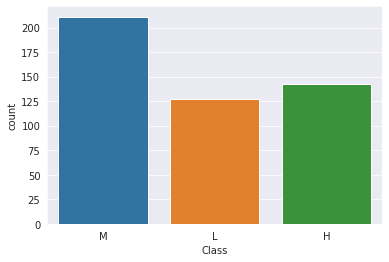

In [72]:
sns.countplot('Class', data=edu_df);

In [73]:
accuracy_score(y_true=y_test, y_pred=pred)

0.6875

In [75]:
precision_score(y_true=y_test, y_pred=pred, average='weighted')

0.6854967948717948

In [79]:
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           H       0.65      0.61      0.63        28
           L       0.71      0.87      0.78        23
           M       0.69      0.64      0.67        45

    accuracy                           0.69        96
   macro avg       0.69      0.71      0.69        96
weighted avg       0.69      0.69      0.68        96

